**Data Description**


---

There are 3 types of input features:


*   **Objective**: factual information
*   **Examination**: results of medical examination
*   **Subjective**: information given by the patient.


---
The features list:

1.  Age | Objective Feature | age | int (days)
2.  Height | Objective Feature | height | int (cm) |
3.  Weight | Objective Feature | weight | float (kg) |
4.  Gender | Objective Feature | gender | categorical code |
5.  Systolic blood pressure | Examination Feature | ap_hi | int |
6.  Diastolic blood pressure | Examination Feature | ap_lo | int |
7.  Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.  Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.  Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |






In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Load the data**

---



In [123]:
# read the raw data
df = pd.read_csv('https://raw.githubusercontent.com/mialmohaimeed/T5-Final-prject/main/cardio_train.csv', sep=';')
df.sample(70)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
56708,80955,15070,1,168,65.0,120,60,1,1,0,0,1,0
34102,48724,21823,2,170,83.0,150,90,2,1,0,0,1,1
17233,24626,18901,1,150,75.0,160,80,1,1,0,0,1,1
2243,3164,23356,2,165,85.0,180,1100,3,1,0,0,1,1
60016,85677,21979,1,164,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65989,94201,20354,2,175,68.0,120,80,1,1,0,0,1,0
67029,95688,21003,2,165,63.0,120,80,1,1,0,0,0,1
36029,51441,17568,2,167,84.0,120,80,1,1,0,0,1,0
67403,96249,20503,2,170,80.0,130,90,3,1,0,0,1,1


In [124]:
# dedecting missing value 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Cleaning and Analysis Data**  

In [125]:
# detect missing values, if False that means no missing value  
df.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
# null value in each columne
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [127]:
~df.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,True,True,True,True,True,True,True,True,True,True,True,True,True
69996,True,True,True,True,True,True,True,True,True,True,True,True,True
69997,True,True,True,True,True,True,True,True,True,True,True,True,True
69998,True,True,True,True,True,True,True,True,True,True,True,True,True


In [128]:
df[~df.isna()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [129]:
# check columns names
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [130]:
# rename column name
df.rename(columns={'gluc': 'glucose'}, inplace=True )

In [131]:
# check columns after rename
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'glucose', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [132]:
# check data type 
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
glucose          int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [133]:
# convert columne wight type into int
df['weight']=df.weight.astype('int')

In [134]:
# check data type after convert
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
glucose        int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [135]:
#check number of rows, number of columns
df.shape

(70000, 13)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   glucose      70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [137]:
# check about the uniqe value
df.id.nunique()

70000

In [138]:
# converting hghit from cm to m then 
m= df.height /100.0;
m

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 70000, dtype: float64

In [139]:
# convert columne height type into int
df['height']=df.height.astype('int')

In [140]:
#replace values in hight colume with m values
df['height'].replace(m,inplace =True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,18393,2,1.65,62,110,80,1,1,0,0,1,0
1,1,20228,1,1.59,85,140,90,3,1,0,0,1,1
2,2,18857,1,1.48,64,130,70,3,1,0,0,0,1
3,3,17623,2,1.70,82,150,100,1,1,0,0,1,1
4,4,17474,1,1.59,56,100,60,1,1,0,0,0,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  int64  
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   glucose      70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [142]:
# convert columne height type into flote 
df['height']=df.height.astype('float')
#df['weight']=df.weight.astype('int')


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  int64  
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   glucose      70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [144]:
## try to find the right function to calaculte height^2 

import math
#df['height'].apply(lambda x: float(x))
##df['height_sq']=np.sqrt((df['height'])) 
# create new columne BMI  and calculate the value (wight / height^2) 

df['height_sq2']=df['height']**2
df['BMI']=df['weight'] /df['height_sq2']

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,height_sq2,BMI
0,0,18393,2,1.65,62,110,80,1,1,0,0,1,0,2.7225,22.773186
1,1,20228,1,1.59,85,140,90,3,1,0,0,1,1,2.5281,33.622088
2,2,18857,1,1.48,64,130,70,3,1,0,0,0,1,2.1904,29.218408
3,3,17623,2,1.70,82,150,100,1,1,0,0,1,1,2.8900,28.373702
4,4,17474,1,1.59,56,100,60,1,1,0,0,0,0,2.5281,22.151023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.65,76,120,80,1,1,1,0,1,0,2.7225,27.915519
69996,99995,22601,1,1.57,126,140,90,2,2,0,0,1,1,2.4649,51.117692
69997,99996,19066,2,1.48,105,180,90,3,1,0,1,0,1,2.1904,47.936450
69998,99998,22431,1,1.53,72,135,80,1,2,0,0,0,1,2.3409,30.757401


In [145]:
# drop the columne height_sq,height	,weight  no need for it now :) 

df.drop(['height','weight','height_sq2'], axis=1)


,id,age,gender,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,BMI
0,0,18393,2,110,80,1,1,0,0,1,0,22.773186
1,1,20228,1,140,90,3,1,0,0,1,1,33.622088
2,2,18857,1,130,70,3,1,0,0,0,1,29.218408
3,3,17623,2,150,100,1,1,0,0,1,1,28.373702
4,4,17474,1,100,60,1,1,0,0,0,0,22.151023
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,120,80,1,1,1,0,1,0,27.915519
69996,99995,22601,1,140,90,2,2,0,0,1,1,51.117692
69997,99996,19066,2,180,90,3,1,0,1,0,1,47.936450
69998,99998,22431,1,135,80,1,2,0,0,0,1,30.757401


In [146]:
# convert age from days into years 
a = df.age /365.0;
a

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [147]:
#replace values in age colume with m values
df['age'].replace(a,inplace =True)

In [148]:
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,height_sq2,BMI
55719,79511,41.509589,1,1.68,43,120,70,1,1,0,0,1,1,2.8224,15.235261
66000,94219,48.087671,1,1.57,98,160,100,3,2,0,0,1,1,2.4649,39.758205
1902,2690,47.986301,1,1.80,65,140,80,2,2,0,0,1,0,3.2400,20.061728
61476,87785,63.868493,1,1.80,60,120,80,1,1,0,0,1,0,3.2400,18.518519
25190,35964,56.194521,1,1.65,85,140,100,1,1,0,0,0,1,2.7225,31.221304


In [149]:
# convert columne age , BMI type into int
df['age']=df.age.astype('int')
df['BMI']=df.BMI.astype('int')

In [150]:
# drop the columne height_sq2,height	,weight  no need for it now :) 

df.drop(['height','weight','height_sq2'], axis=1)

,id,age,gender,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,BMI
0,0,41,2,110,80,1,1,0,0,1,0,22
1,1,54,1,140,90,3,1,0,0,1,1,33
2,2,60,1,130,70,3,1,0,0,0,1,29
3,3,52,2,150,100,1,1,0,0,1,1,28
4,4,58,1,100,60,1,1,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,45,2,120,80,1,1,1,0,1,0,27
69996,99995,58,1,140,90,2,2,0,0,1,1,51
69997,99996,54,2,180,90,3,1,0,1,0,1,47
69998,99998,54,1,135,80,1,2,0,0,0,1,30


**Data Visualization**



---







1.  What is the **most age** affecting the occurrence of cardiovascular diseasee?

2. find if **smoke** affecting the occurrence of cardiovascular diseasee?

In [151]:
#find the uniqe value of cardio in the dataste
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

That mean we have balanced data :)

In [152]:
#find the uniqe vaule for each age
df.age.value_counts()

57    3992
55    3957
49    3723
54    3601
58    3553
50    3552
53    3485
59    3444
51    3339
56    3252
52    3211
61    2904
60    2802
63    2586
64    2392
43    2297
62    2286
47    2222
41    1938
39    1842
48    1803
45    1698
46    1676
44    1600
40    1518
42    1326
29       1
Name: age, dtype: int64

That most age affected is fifty years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


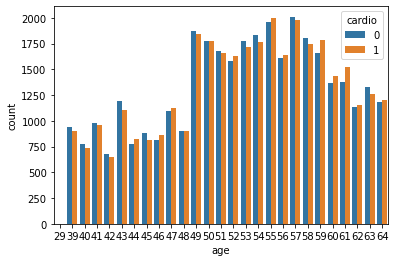

In [155]:
sns.countplot(df.age, hue='cardio',data=df)


In [153]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Women suffer from cardiovascular diseases more than men :(


---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


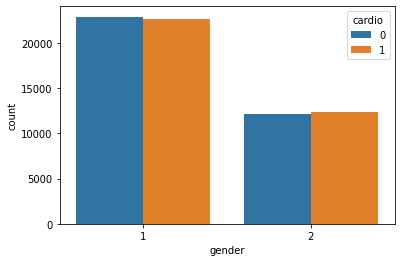

In [154]:
sns.countplot(df.gender, hue='cardio',data=df)


In [156]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,height_sq2,BMI
0,0,41,2,1.65,62,110,80,1,1,0,0,1,0,2.7225,22
1,1,54,1,1.59,85,140,90,3,1,0,0,1,1,2.5281,33
2,2,60,1,1.48,64,130,70,3,1,0,0,0,1,2.1904,29
3,3,52,2,1.70,82,150,100,1,1,0,0,1,1,2.8900,28
4,4,58,1,1.59,56,100,60,1,1,0,0,0,0,2.5281,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,45,2,1.65,76,120,80,1,1,1,0,1,0,2.7225,27
69996,99995,58,1,1.57,126,140,90,2,2,0,0,1,1,2.4649,51
69997,99996,54,2,1.48,105,180,90,3,1,0,1,0,1,2.1904,47
69998,99998,54,1,1.53,72,135,80,1,2,0,0,0,1,2.3409,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


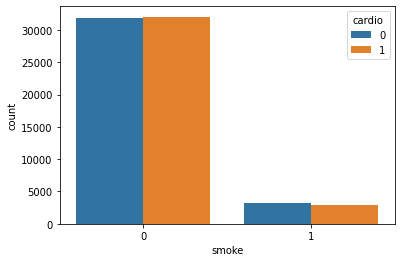

In [157]:
sns.countplot(df.smoke, hue='cardio',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


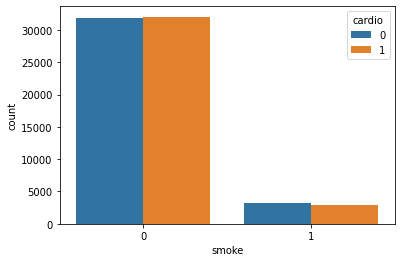

In [158]:
sns.countplot(df.smoke, hue='cardio',data=df)

In [159]:
#sns.pairplot(df,hue='cardio')

**Models** 

---



In [164]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,height_sq2,BMI
0,0,41,2,1.65,62,110,80,1,1,0,0,1,0,2.7225,22
1,1,54,1,1.59,85,140,90,3,1,0,0,1,1,2.5281,33
2,2,60,1,1.48,64,130,70,3,1,0,0,0,1,2.1904,29
3,3,52,2,1.70,82,150,100,1,1,0,0,1,1,2.8900,28
4,4,58,1,1.59,56,100,60,1,1,0,0,0,0,2.5281,22


In [175]:

y= df.cardio
x= df.drop('cardio' , inplace=True ,axis=1)

In [176]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [177]:
x=df
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,height_sq2,BMI
0,0,41,2,1.65,62,110,80,1,1,0,0,1,2.7225,22
1,1,54,1,1.59,85,140,90,3,1,0,0,1,2.5281,33
2,2,60,1,1.48,64,130,70,3,1,0,0,0,2.1904,29
3,3,52,2,1.70,82,150,100,1,1,0,0,1,2.8900,28
4,4,58,1,1.59,56,100,60,1,1,0,0,0,2.5281,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,45,2,1.65,76,120,80,1,1,1,0,1,2.7225,27
69996,99995,58,1,1.57,126,140,90,2,2,0,0,1,2.4649,51
69997,99996,54,2,1.48,105,180,90,3,1,0,1,0,2.1904,47
69998,99998,54,1,1.53,72,135,80,1,2,0,0,0,2.3409,30


In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25 ,random_state=0)

In [179]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [181]:
#prdicte carido 0,1

y_prid=lr.predict(x_test)

In [182]:
y_prid

array([1, 1, 1, ..., 0, 1, 1])

In [183]:
metrics.accuracy_score(y_test,y_prid)

0.6270285714285714

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3 )
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [185]:
y_prid_rf=rf.predict(x_test)
metrics.accuracy_score(y_test,y_prid_rf)

0.7225142857142857